# Notebook context
    
    In this notebook we will attempt at observing the following points:
    1. Is there a correlation between job sat and career satisfaction?
    2. Can we find correlations between job/career satisfaction and other variables 
        which we consider to have some potential in impacting job satisfaction? 
        e.g.: agefirstcode, yearscode, orgsize, mngidiot, gender, age
    3. Testig the variables against the linear model and decision trees for answering the previous points

In [3]:
library(tidyverse)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


The selected dataset contains over 80 answers categories from the respondends.
Each or more could be relevant factors in influencing the career satisfaction of the respondends. 
We will start by looking on some of the columns which we believe should influence the career satisfaction of a respondent. These columns are: JobSat, CareerSat, OrgSize, YearsCode, Age1stCode, Age. 

Below we are ordering the career satisfaction, job satisfaction and organization size in order to see what responses have a higher weight in general. 

In [4]:
data2019 <- read.csv("soData2019_clean.csv", stringsAsFactors=TRUE)
dim(data2019)

[1] 88883    85

## Selecting, filtering and plotting the data

In [5]:
data2019$CareerSat <- factor(data2019$CareerSat, levels = c("Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied", NA), ordered = TRUE)
data2019$JobSat <- factor(data2019$JobSat, levels = c("Very satisfied","Slightly satisfied","Neither satisfied nor dissatisfied","Slightly dissatisfied","Very dissatisfied","NA"), ordered = TRUE)
data2019$OrgSize <- factor(data2019$OrgSize, levels = c("10,000 or more employees","5,000 to 9,999 employee","1,000 to 4,999 employees","500 to 999 employees","100 to 499 employees","20 to 99 employees","10 to 19 employees","2-9 employees","Just me - I am a freelancer, sole proprietor, etc.","NA"), ordered = TRUE)

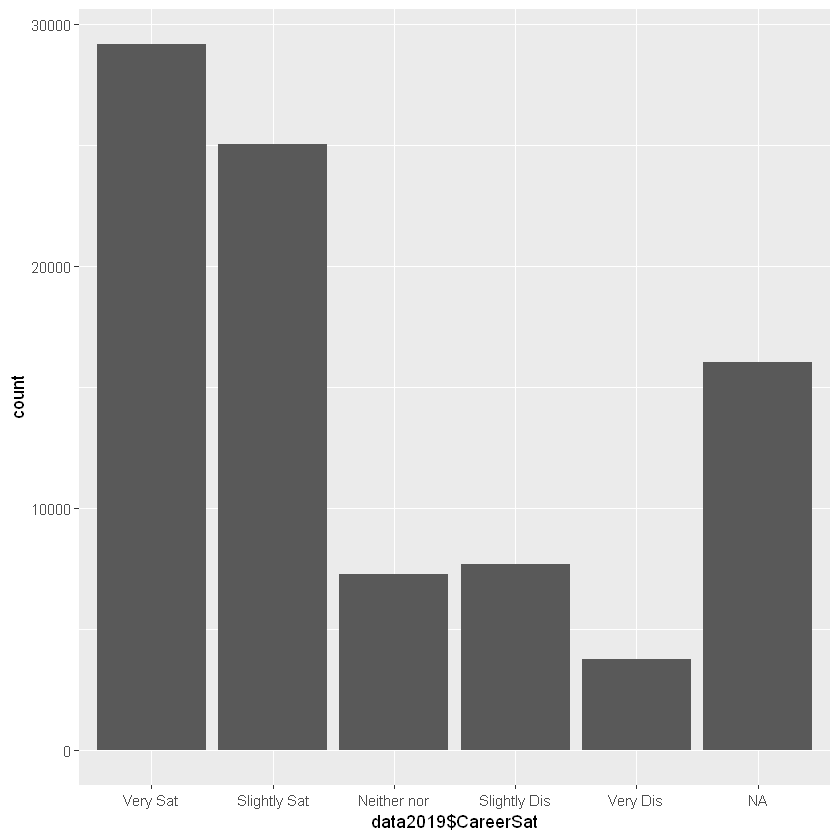

In [6]:
ggplot(data = data2019, aes(data2019$CareerSat)) + stat_count() + scale_x_discrete(labels = c("Very satisfied"="Very Sat", "Slightly satisfied" = "Slightly Sat", "Neither satisfied nor dissatisfied" = "Neither nor", "Slightly dissatisfied" = "Slightly Dis", "Very dissatisfied" = "Very Dis"))

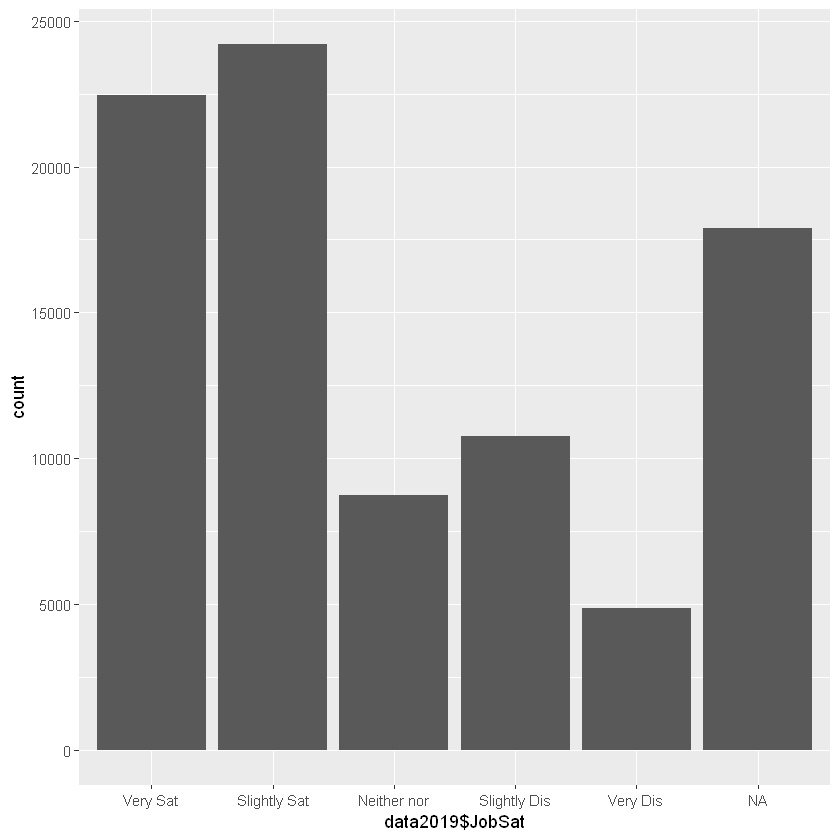

In [7]:
ggplot(data = data2019, aes(data2019$JobSat)) + stat_count() + scale_x_discrete(labels = c("Very satisfied"="Very Sat", "Slightly satisfied" = "Slightly Sat", "Neither satisfied nor dissatisfied" = "Neither nor", "Slightly dissatisfied" = "Slightly Dis", "Very dissatisfied" = "Very Dis"))

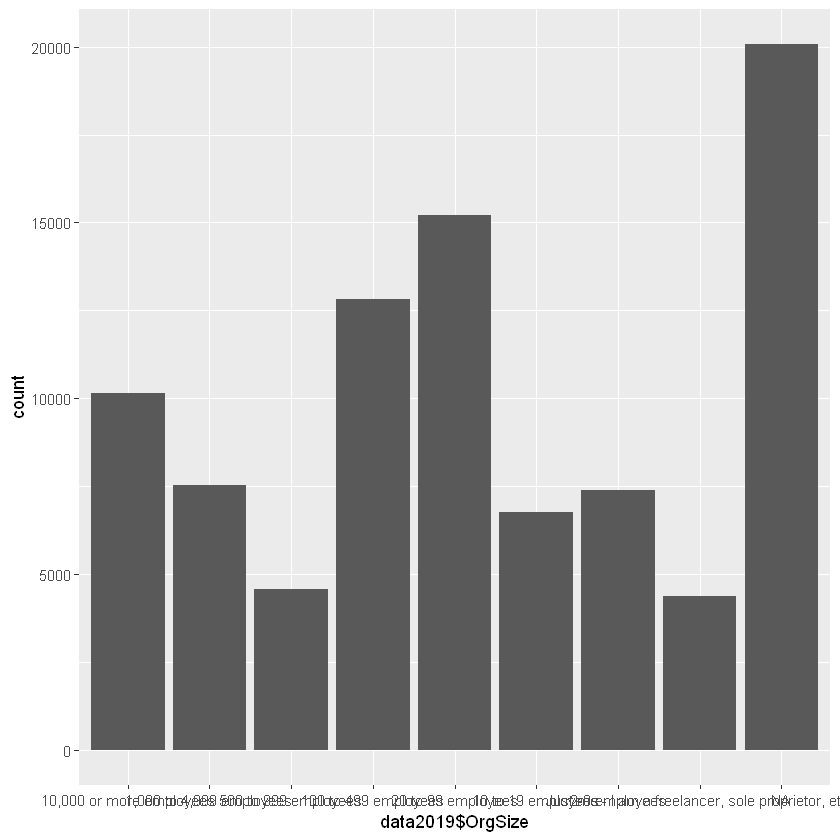

In [8]:
ggplot(data = data2019, aes(data2019$OrgSize)) + stat_count() + scale_x_discrete(labels = c("Very satisfied"="Very Sat", "Slightly satisfied" = "Slightly Sat", "Neither satisfied nor dissatisfied" = "Neither nor", "Slightly dissatisfied" = "Slightly Dis", "Very dissatisfied" = "Very Dis"))

After running these tables, we can see that career satisfaction received more responses from people being 
very satisfied while job satisfaction shows that more people are satisfied with their job rather than very satisfied. 

Also a lot of the respondednts seem to be the sole proprietor of the business / company they are part of. 


In the following cells, we will try to group job satisfaction and carreer satisfaction so we can see if there might be a potential correlation between these two values.

Warning message:
"Factor `JobSat` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Factor `CareerSat` contains implicit NA, consider using `forcats::fct_explicit_na`"

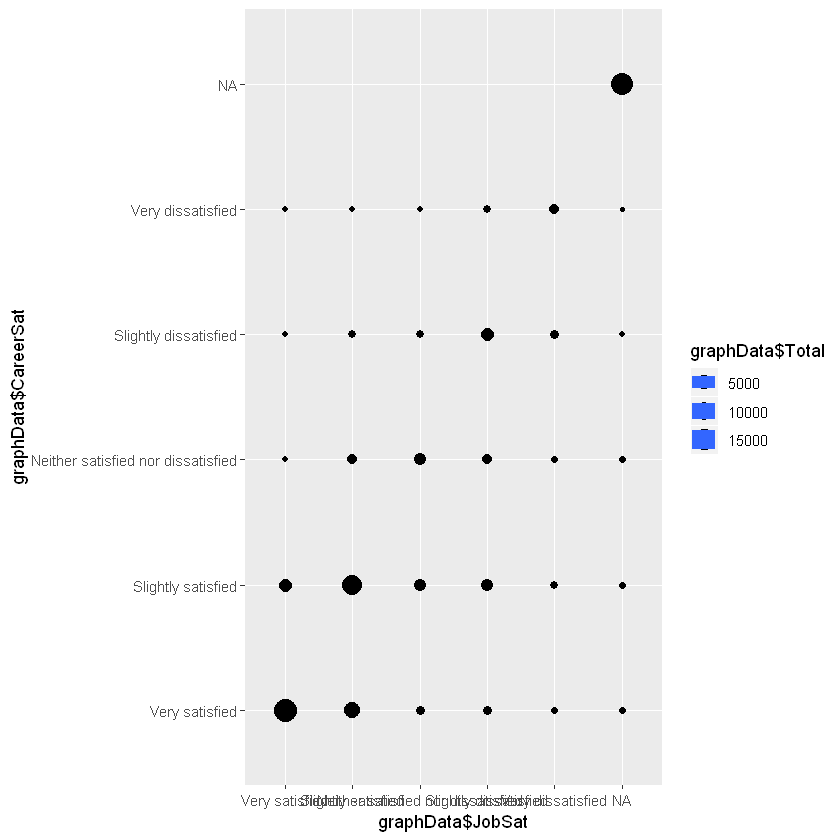

In [9]:
graphData <- data2019 %>% 
    group_by(JobSat, CareerSat) %>% 
        summarize(Total = n())
ggplot(data = graphData, mapping = aes(x = graphData$JobSat, y = graphData$CareerSat, size = graphData$Total)) +
  geom_point() +  geom_smooth(method = "lm", se = FALSE)

From the graph above we can see that perhaps we might be able to observe later on some degree of corelation between the job satisfaction and career satisfaction (as it is expected). In order to confirm this and calculate some numbers, we need to convert some of the columns to numeric values. We do so in the following cell (the tables with counts serve as comparisons with the original dataset, to prove that we haven't changed the data in the transformation process).

In [10]:
numericData2019 <- data2019

numericData2019$CareerSat <- factor(numericData2019$CareerSat, levels = c("Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied", "NA"), labels = c(1, 2, 3, 4, 5, 0), ordered = TRUE)
numericData2019$JobSat <- factor(numericData2019$JobSat, levels = c("Very satisfied","Slightly satisfied","Neither satisfied nor dissatisfied","Slightly dissatisfied","Very dissatisfied","NA"), labels = c(1, 2, 3, 4, 5, 0), ordered = TRUE)
numericData2019$OrgSize <- factor(numericData2019$OrgSize, levels = c("10,000 or more employees","5,000 to 9,999 employee","1,000 to 4,999 employees","500 to 999 employees","100 to 499 employees","20 to 99 employees","10 to 19 employees","2-9 employees","Just me - I am a freelancer, sole proprietor, etc.","NA"), labels = c(9, 8, 7, 6, 5, 4, 3, 2, 1, 0), ordered = TRUE)

numericData2019$CareerSat.f <- as.numeric(factor(numericData2019$CareerSat))
numericData2019$JobSat.f <- as.numeric(factor(numericData2019$JobSat))
numericData2019$OrgSize.f <- as.numeric(factor(numericData2019$OrgSize))

###############__Validating that the data count remains the same after transformation__#########################################  

#data2019 %>% group_by(CareerSat) %>% summarize(count = n())
#data2019 %>% group_by(JobSat) %>% summarize(count = n())
#data2019 %>% group_by(OrgSize) %>% summarize(count = n())

#numericData2019 %>% group_by(CareerSat) %>% summarize(count = n())
#numericData2019 %>% group_by(JobSat) %>% summarize(count = n())
#numericData2019 %>% group_by(OrgSize) %>% summarize(count = n())

We also need to remove the rows which contain NA values in one of the relevant columns (JobSat, CareerSat and OrgSize).

In the tree we needed categorical variables that are not numbers (gathered in dataset cleanNumericData2019ForTree); yet in finding the Pearson's corellation between the selected variables, we needed numerical values (gathered in the cleanNumericData2019).  

In [11]:
#### Observing that the data without NA is smaller yet cleaner #########
dim(numericData2019)

cleanNumericData2019 <- select(numericData2019, JobSat.f, CareerSat.f, OrgSize.f, YearsCode, Age1stCode, Age) #, Gender)
cleanNumericData2019ForTree <- select(numericData2019, JobSat, CareerSat, OrgSize, YearsCode, Age1stCode, Age)
cleanNumericData2019 <- cleanNumericData2019[complete.cases(cleanNumericData2019), ]
cleanNumericData2019ForTree <- cleanNumericData2019ForTree[complete.cases(cleanNumericData2019ForTree), ]

dim(cleanNumericData2019)
dim(cleanNumericData2019ForTree)

[1] 88883    88

[1] 66041     6

[1] 66041     6

The above numbers show how removing the NA for only these selected values, means that we are losing approx 22.000 observations.
Below we will use this new data with the above used graph in order to see if a potential correlation can still be seen. 

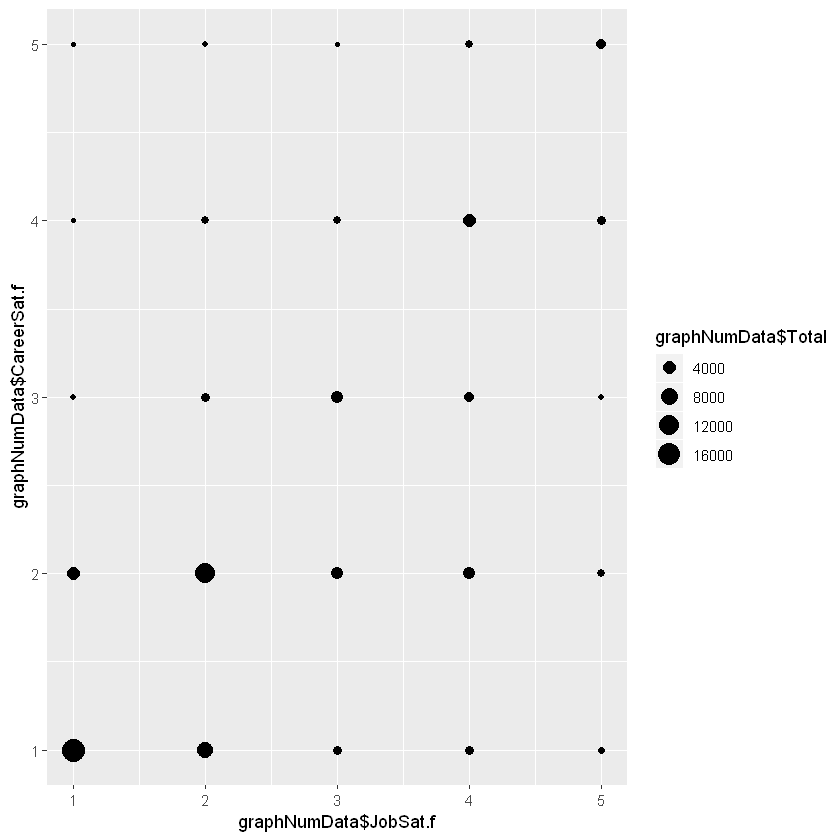

In [12]:
graphNumData <- cleanNumericData2019 %>% 
    group_by(JobSat.f, CareerSat.f) %>% 
        summarize(Total = n())

ggplot(data = graphNumData, mapping = aes(x = graphNumData$JobSat.f, y = graphNumData$CareerSat.f, size = graphNumData$Total)) +
  geom_point()


From this plot, it seems that removing the NA values resulted in a direct proportional decrease, more or less, hence the correlation posibility concluded previously is not affected by the NAs. 

Based on the further transformed data, we will try to calculate some correlations.
Next we will try and actually plot for some correlations. 

## Testing the above selected data against supervised lerning models

In this section, we will create a model for supervised machine learning. In our case, we would like see whether the career satisfaction level can be inferred based on other variables from the previously cleaned dataset. Since we know the career satisfaction levels, we will focus on supervised machine learning practices. Given the fact that our data are more of a categorical nature, we will create a classification model.

First, however, we'll try to find correlations between different variables from the set. Knowing which correlations are the highest will help us to choose the right columns for training the model. In the following cells, we'll create a correlation matrix followed by a correlation heatmap to see which columns might make a good fit for the model.

In [13]:
correlationMatrix <- round(cor(cleanNumericData2019), 3)
correlationMatrix

,JobSat.f,CareerSat.f,OrgSize.f,YearsCode,Age1stCode,Age
JobSat.f,1.000,0.636,-0.010,-0.039,0.035,-0.015
CareerSat.f,0.636,1.000,0.035,-0.030,0.031,-0.006
OrgSize.f,-0.010,0.035,1.000,-0.017,0.012,-0.011
YearsCode,-0.039,-0.030,-0.017,1.000,-0.313,0.749
Age1stCode,0.035,0.031,0.012,-0.313,1.000,0.009
Age,-0.015,-0.006,-0.011,0.749,0.009,1.000



Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



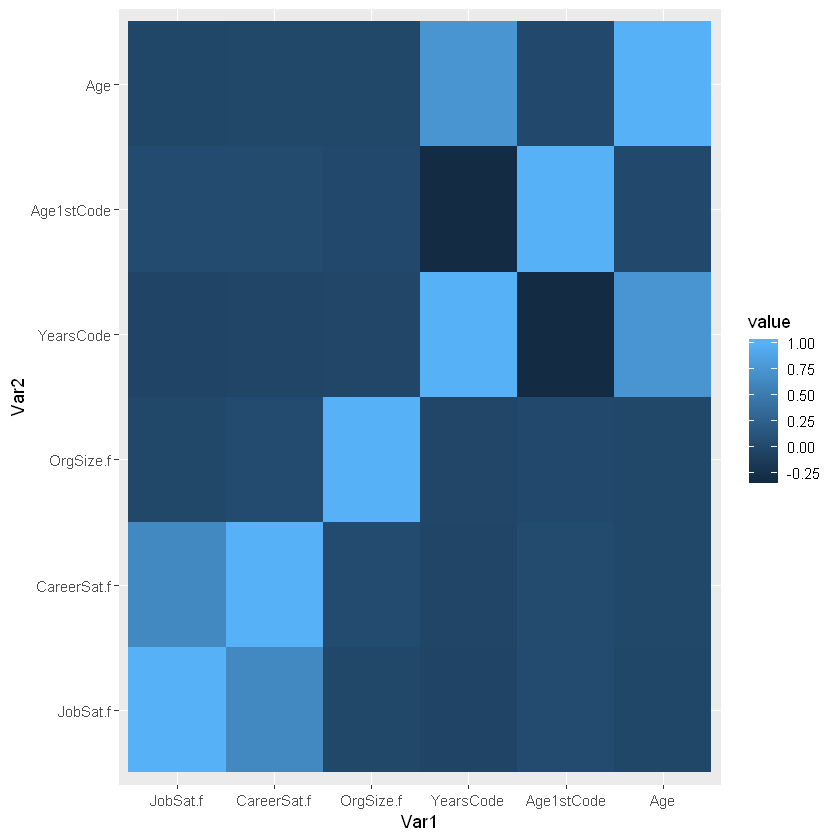

In [15]:
# need to install a ggplot2 and reshape2 libraries to create the heatmap
library(ggplot2)
library(reshape2)

meltedCorrelationMatrix <- melt(correlationMatrix)

ggplot(data = meltedCorrelationMatrix, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

From the cells above, it is clear that **BLAHH BLAH BLAH BLAH**.

In [16]:
#explaining the 0.64 correlation from above matrice between Career and Job Satisfaction 

cor(cleanNumericData2019$JobSat.f, cleanNumericData2019$CareerSat.f,  method = "pearson", use = "complete.obs")
model <- lm(formula = CareerSat.f ~ JobSat.f, data = cleanNumericData2019)
summary(model)

[1] 0.6362818


Call:
lm(formula = CareerSat.f ~ JobSat.f, data = cleanNumericData2019)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6380 -0.4519 -0.2658  0.5481  3.7342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.672727   0.007352   91.51   <2e-16 ***
JobSat.f    0.593048   0.002798  211.95   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8985 on 66039 degrees of freedom
Multiple R-squared:  0.4049,	Adjusted R-squared:  0.4048 
F-statistic: 4.492e+04 on 1 and 66039 DF,  p-value: < 2.2e-16


In [17]:
set.seed(1234)
trainRows <- sample(1:nrow(cleanNumericData2019ForTree), 46228)
testRows <- setdiff(1:nrow(cleanNumericData2019ForTree), trainRows)
trainingData2019 <- cleanNumericData2019ForTree[trainRows, ]
testData2019 <- cleanNumericData2019ForTree[testRows, ]

In [18]:
library(rpart)

dataTree <- rpart(CareerSat ~ ., trainingData2019) 
summary(dataTree)

Call:
rpart(formula = CareerSat ~ ., data = trainingData2019)
  n= 46228 

          CP nsplit rel error    xerror        xstd
1 0.23577059      0 1.0000000 1.0000000 0.003832855
2 0.01447459      1 0.7642294 0.7642294 0.003889065
3 0.01000000      4 0.7164651 0.7164651 0.003862616

Variable importance
    JobSat Age1stCode        Age    OrgSize 
        98          1          1          1 

Node number 1: 46228 observations,    complexity param=0.2357706
  predicted class=1  expected loss=0.5955482  P(node) =1
    class counts: 18697 16007  4415  4826  2283
   probabilities: 0.404 0.346 0.096 0.104 0.049 
  left son=2 (14689 obs) right son=3 (31539 obs)
  Primary splits:
      JobSat     splits as  LRRRRR,     improve=4310.26300, (0 missing)
      YearsCode  < 36.5   to the right, improve=  28.62016, (0 missing)
      Age        < 52.5   to the right, improve=  26.89570, (0 missing)
      Age1stCode < 15.205 to the left,  improve=  18.24279, (0 missing)
      OrgSize    splits as  LLL

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kucer\AppData\Local\Temp\Rtmpq4e4Dq\downloaded_packages


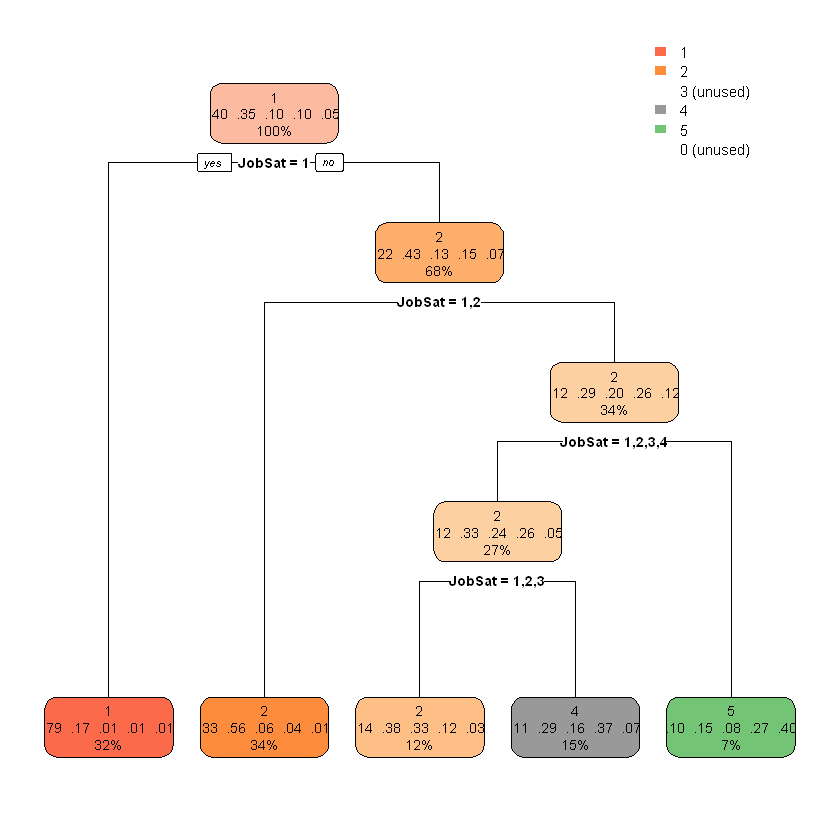

In [19]:
install.packages("rpart.plot")
library(rpart.plot)

rpart.plot(dataTree)

In [20]:
predictCareerSat <- predict(dataTree, newdata = testData2019, type = "class")
table(predictCareerSat, testData2019$CareerSat)

                
predictCareerSat    1    2    3    4    5    0
               1 4997 1053   73   64   74    0
               2 2598 4761 1203  504  183    0
               3    0    0    0    0    0    0
               4  369  898  449 1054  217    0
               5  139  197  113  352  515    0
               0    0    0    0    0    0    0

Correct - 11.327

Incorrect - 8.486

Total - 66041 with 46228 for training set

Approx. 74,92% cases of predictions were correct. 

## Notebook summary


After installing the Hmisc library and requesting a correlation index between all the variables we chose to look at, we obviously observed a perfect correlation value of 1 between the same values, which is to be expected when using this approach,yet most of the categories do not seem to have a correlation with Career satosfaction nor job satisfaction.

The expected correlation between job and career satisfaction is confirmed here, but unfortunately we cannot rellay make use of this information because career satisfaction and job satisfaction can mean the same thing for many respondends.

We also tested the relationship between these values agains a decision tree, hence making use of the 7:3 ratio where aproximately 70% of this data is taken as training data for the model and 30% is test data.

Therefore we chose to not look into this correlation, and we can conclude that so far we could not see what other factor from this data set can have a significant impact on a technical person's job satisfaction.

So far, our approach from here would be to repeat the cleaning process and look at other categorical variables from the original data set in order to see if indeed there is no factor within our data sample that can impact career satisfaction. 